# Gradient Descent

Version 1.22

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

## Notebook Learning Goals

A the end of this notebook you are going to know how to implement the famous minimization method called **gradient descent** from scratch. This is a useful exercise to prepare yourself to understand more complex neural networks algorithms.

## Theory behind Gradient Descent

The objective of gradient descent is to numerically find the minimum of any given function. It is suited for those problems for which an analytical solution is not available, such as in the case of neural networks (big number of weights).

Given a generic function $J(\mathbf{w})$, where $\mathbf{w}$ is a vector of weights, the minimum location in weight space (meaning the value for $\mathbf{w}$ for which $J(\mathbf{w})$ has a minimum) can be found with an algorithm based on the following steps:
1. *Iteration 0*: Choose a random initial guess $\mathbf{w_0}$ 
2. *Iteration $n+1$* (with $n$ starting from 0): The weights at iteration $n+1$ ($\mathbf{w}_{n+1}$) will be updated from the previous values at iteration $n$ ($\mathbf{w}_{n}$) using the formula

$$
\mathbf{w}_{n+1}=\mathbf{w}_{n}-\gamma\nabla J(\mathbf{w}_{n}) \tag{1}
$$

With $J(\mathbf{w}_{n})$, we have indicated the gradient of the cost function, which is a vector whose components are the partial derivatives of the cost function with respect to all the components of the weight vector $\mathbf{w}$, as follows:

$$
J(\mathbf{w}_{n})=\displaystyle
(
\partial J(\mathbf{w})/\partial w_1, 
\dots, \partial J(\mathbf{w})/\partial w_{n_x}) \tag{2}
$$

Let's suppose now that we want to fit some data to a generic function $f({\bf x}^{(i)})$ where ${\bf x}^{(i)}$ is the $i^th$ observation of an input dataset. In general we will have ${\bf x}^{(i)}\in \mathbb{R}^n$ with $n\in \mathbb{N}$, but for this example let's suppose that 
${\bf x}^{(i)}=x^{(i)}\in \mathbb{R}$.

As a cost function, let's choose the  **mean squared error** (MSE):

$$
J(w_o,w_1)=\frac{1}{m} \sum_{i=1}^{m} (y_i-f(x^{(i)}))^2 \tag{3}
$$

where we have indicated with the subscript $i$ the $i^{th}$ observation. In this example we will try to fit a linear function

$$
f(x^{(i)}) = w_0 + w_1 x^{(i)} \tag{4}
$$

to some artificially generated data. Note that in this case the function $f(x^{(i)})$ will depend on the weights $w_0$ and $w_1$, therefore to make this particularly clear, we will indicate our $f$ function as $f(w_0, w_1, x^{(i)})$.

## Gradient Descent Implementation with a Simulated Dataset

For this example, we will use a simulated dataset made of 1 feature and 30 samples. As cost function we will consider MSE and we will apply a linear regression model as hypothesis.

### Libraries Import

This section contains the necessary libraries (such as numpy or matplotlib) you need to import to execute the code.

In [ ]:
# general libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed 

In [ ]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.


In [ ]:
# This cell imports some custom written functions that we have created to 
# make the plotting easier. You don't need to undertsand the details and 
# you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

### Dataset Generation <a name = "dg"></a>

Let’s consider the dataset formed by $m = 30$ observations y generated by the code:

In [ ]:
m = 30
w0 = 2
w1 = 0.5
x = np.linspace(-1,1,m)
y = w0 + w1 * x

Note how we are generating our data with Equation (4) that in Python can be written as ```y = w0 + w1 * x```.

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

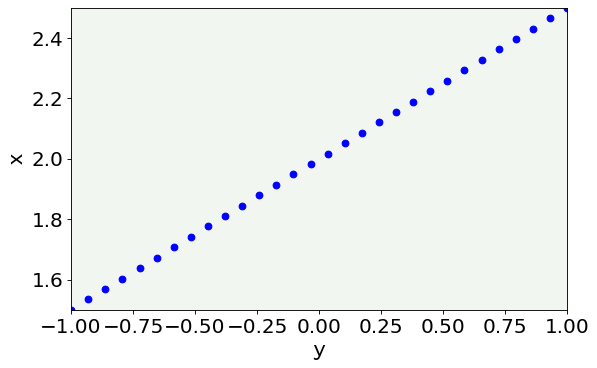

In [ ]:
# plot the data we are going to use

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x, y, marker = 'o', c = 'blue')

plt.ylabel('x', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('y', fontproperties = fm.FontProperties(fname = f))

plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))

plt.axis(True)
plt.show()

### Cost Function Implementation

As a cost function we consider the MSE as we discussed in the theory section. We need to implement Equations (3) and (4).

In [ ]:
# Equation (4)
def hypothesis(x,w0,w1):
  return w0 + w1*x

In [ ]:
# Equation (3)
def cost_function_mse(x,y,w0,w1):
  return np.mean((y - hypothesis(x,w0,w1))**2)/2

### Gradient Descent Application

Our goal is to find the values for $w_0$ and $w_1$ that minimize $J(w_0,w_1)$.

To apply the gradient descent method, we must calculate the series for $w_{0,n}$ and $w_{1,n}$ from Equation (1). We obtain the following results (where the sum is over all the $m$ training dataset observations):

$$
\begin{cases}
w_{0,n+1}=w_{0,n}-\gamma\displaystyle \frac{\partial{J(w_{0,n},w_{1,n})}}{\partial{w_0}}=w_{0,n}+\gamma\frac{1}{m} \sum_{i=1}^{m} 2(y_i-f(w_{0,n},w_{1,n},x_i))\frac{\partial{f(w_0,w_1,x_i)}}{\partial{w_0}}\\
w_{1,n+1}=w_{1,n}-\gamma\displaystyle \frac{\partial{J(w_{0,n},w_{1,n})}}{\partial{w_1}}=w_{1,n}+\gamma\frac{1}{m} \sum_{i=1}^{m} 2(y_i-f(w_{0,n},w_{1,n},x_i))\frac{\partial{f(w_0,w_1,x_i)}}{\partial{w_1}}
\end{cases} \tag{5}
$$

Simplifying the equations by calculating the partial derivatives gives:

$$
\begin{cases}
w_{0,n+1}=w_{0,n}+\displaystyle\frac{2\gamma}{m} \sum_{i=1}^{m} (y_i-f(w_{0,n},w_{1,n},x_i))=w_{0,n}(1-\gamma)+\frac{2\gamma}{m}\sum_{i=1}^{m} (y_i-w_{1,n}x_i)\\
w_{1,n+1}=w_{1,n}+\displaystyle \frac{2\gamma}{m}\sum_{i=1}^{m} (y_i-f(w_{0,n},w_{1,n},x_i))x_i=w_{1,n}+\frac{2\gamma}{m}\sum_{i=1}^{m} (y_i-w_{0,n}-w_{1,n}x_i)x_i
\end{cases} \tag{6}
$$

Since 
$$\frac{\partial{f(w_0,w_1,x_i)}}{\partial{w_0}}=1$$

and 

$$\frac{\partial{f(w_0,w_1,x_i)}}{\partial{w_1}}=x_i$$

Equations (6) are the ones that must be implemented in Python.

Remember that $\gamma$ is called the learning rate and must be chosen carefully. But how can we choose the correct learning rate? Or the correct number of iterations? There are no fixed rules, but a good rule of thumb is to start with $\gamma=0.05$ and then see how the cost function behaves. It is rather common to plot $J({\mathbf w})$ versus the number of iterations, to check that it decreases and the speed at which it is decreasing.

Remember that you are trying to minimize the cost function $J$, and that means that $J$ should decrease with increasing number of iterations. If that does not happen you should stop and see if there are any mistake in the code.

In [ ]:
def gradient_descent(x,y,gamma,epochs):
  """
  Returns w0 and w1 that minimizes J(w) [the cost function] and the cost 
  function at each epoch. 
  Inputs:
  - x: samples (array)
  - y: output (array)
  - gamma: learning rate
  - epochs: number of epochs to be performed
  """
  random.seed(42)
  w0 = random.random() # randomly initialize w0
  w1 = random.random() # randomly initialize w1
  m = len(x) # number of samples
  cf = []
  for i in range(epochs): # repeat n times (n: number of epochs)
    w0 = w0*(1 - gamma) + (gamma/m)*np.sum(y - w1*x) # update w0
    w1 = w1 + (gamma/m)*np.sum((y - w0 - w1*x)*x) # update w1
    cf.append(cost_function_mse(x,y,w0,w1))

  return w0,w1,cf

We will try and compare three different values for the learning rate $\gamma$:
- $\gamma = 0.05$
- $\gamma = 0.8$
- $\gamma = 2.0$

In [ ]:
epochs = 20
w01,w11,cf1 = gradient_descent(x,y,0.05,epochs)
w02,w12,cf2 = gradient_descent(x,y,0.8,epochs)
w03,w13,cf3 = gradient_descent(x,y,2.0,epochs)

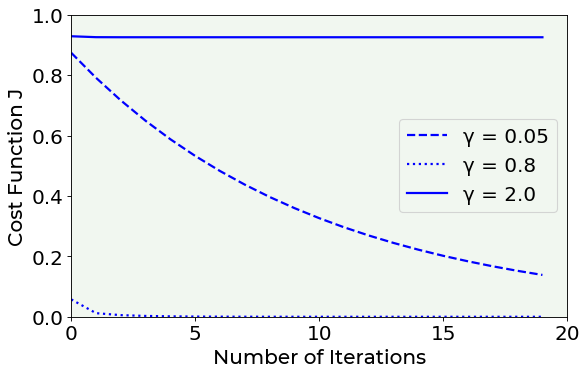

In [ ]:
# Cost function vs Iterations plot

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(list(range(epochs)), cf1, 'k--', color = 'blue', label = 'γ = 0.05')
plt.plot(list(range(epochs)), cf2, 'k:', color = 'blue', label = 'γ = 0.8')
plt.plot(list(range(epochs)), cf3, 'k', color = 'blue', label = 'γ = 2.0')

plt.ylabel('Cost Function J', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Number of Iterations', fontproperties = fm.FontProperties(fname = f))
plt.xticks([0,5,10,15,20])

plt.ylim(0, 1.0)
plt.xlim(0, epochs)

plt.axis(True)
legend = ax.legend(loc = 'best')

plt.show()

Looking at the Cost function vs Number of epochs plot, we decide the best learning rate is $\gamma=0.8$. Why? Let's comment the above plot. We tried three different learning rates: a *small*, a *medium* and a *big* one. As we can notice from the three blue curves, $\gamma=0.05$ is too small, while $\gamma=2$ is too big: in both cases, the cost function cannot reach the $0$ (i.e. the minimum). In the first case, the update's rate of the cost function is too small, therefore a bigger number of iterations is required to reach the $0$. In the second case, since the update's rate of the cost function is too big, $J$ will continue to jump around the minimum even if for a bigger number of iterations and will never reach it.

Finally, our linear regression result in this case is:

In [ ]:
print('w0 = {:.2f}'.format(w02))
print('w1 = {:.2f}'.format(w12))

w0 = 2.00
w1 = 0.50


They are the values we were expecting, since we have built this dataset using Equation (4) and choosing $w_0 = 2$ and $w_1 = 0.5$ (if you have forgotten this, see again [Dataset Generation](#dg) section).

## References

1. Michelucci, Umberto. "Applied Deep Learning." A Case-Based Approach to Understanding Deep Neural Networks 1st Edition, APRESS/Springer (2018) (mathematical details behind gradient descent minimization method)